In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])


In [2]:
df[['job_title_short','job_skills']].head(10)

,job_title_short,job_skills
0,Senior Data Engineer,[]
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
5,Data Engineer,"[python, sql, gcp]"
6,Senior Data Engineer,"[sql, python, java, sql server, gcp, bigquery,..."
7,Data Engineer,"[sql, nosql, gcp, azure, aws, bigquery, databr..."
8,Business Analyst,"[excel, powerpoint, power bi]"
9,Data Scientist,"[sql, python, r, mongodb, mongodb, sql server,..."


In [4]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.
    
    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.
    
        .. versionadded:: 1.3.0
            Multi-column explode
    
    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.
    
    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.
    
    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns

In [14]:
df_exploded = df.explode('job_skills')

skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

df_skills_count = skills_count.reset_index(name='count')

df_skills_count = df_skills_count.sort_values(by='count', ascending=False)

df_skills_count

,job_title_short,job_skills,count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


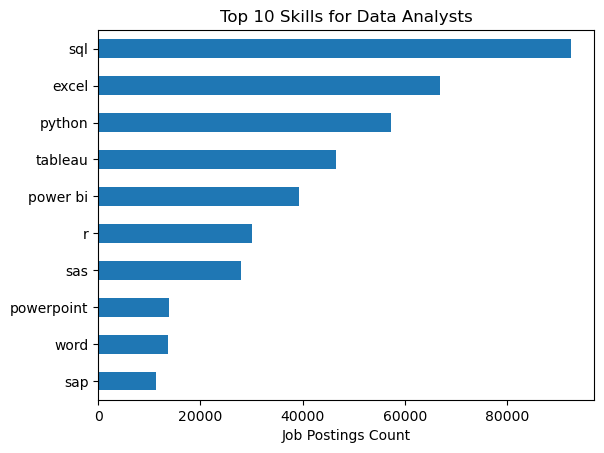

In [25]:
job_title = 'Data Analyst'
top10 = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top10)

df_skill_final.plot(kind = 'barh', x = 'job_skills', y = 'count')
plt.gca().invert_yaxis()
plt.title(f'Top {top10} Skills for {job_title}s')
plt.xlabel('Job Postings Count')
plt.ylabel('')
plt.legend().remove()
plt.show()